In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


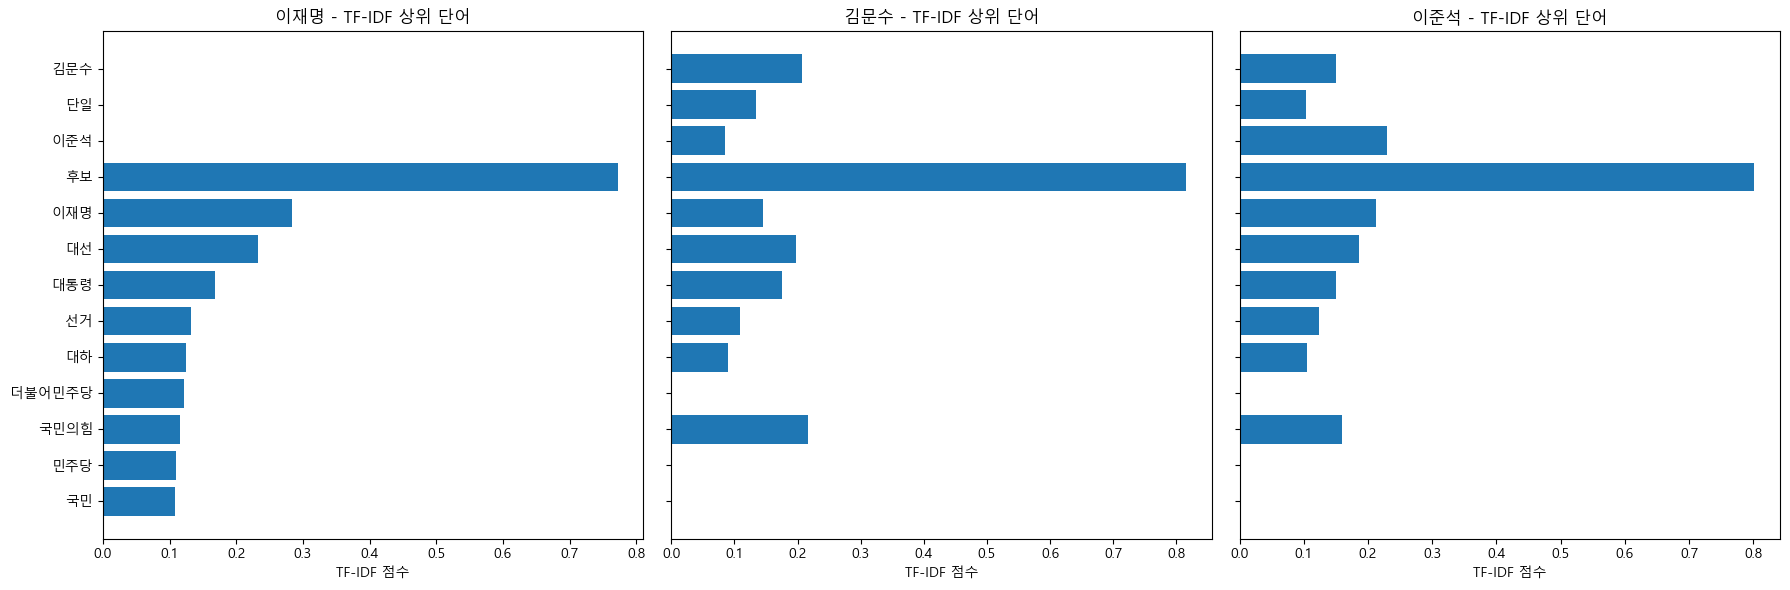

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 분석할 파일 목록
file_paths = {
    '이재명': 'https://raw.githubusercontent.com/hyeriiiiinnn/KORE208_team5/main/4.%20TF-IDF/lee_jaemyung_tagged_filtered.csv',
    '김문수': 'https://raw.githubusercontent.com/hyeriiiiinnn/KORE208_team5/main/4.%20TF-IDF/kim_moonsu_tagged_filtered.csv',
    '이준석': 'https://raw.githubusercontent.com/hyeriiiiinnn/KORE208_team5/main/4.%20TF-IDF/lee_junseok_tagged_filtered_ver2.csv'
}

documents = {}

# 파일별로 텍스트 추출
for name, path in file_paths.items():
    df = pd.read_csv(path)
    docs = []
    for sentence in df['tagged'].dropna():
        tokens = []
        for token in sentence.split():
            if '(' in token and ')' in token:
                word = token.rsplit("(", 1)[0]
                tokens.append(word)  # ✅ 이 줄이 필수!
        docs.append(" ".join(tokens))
    documents[name] = " ".join(docs)

# TF-IDF 분석
corpus = list(documents.values())
names = list(documents.keys())
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf.index):
    top_terms = df_tfidf.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()


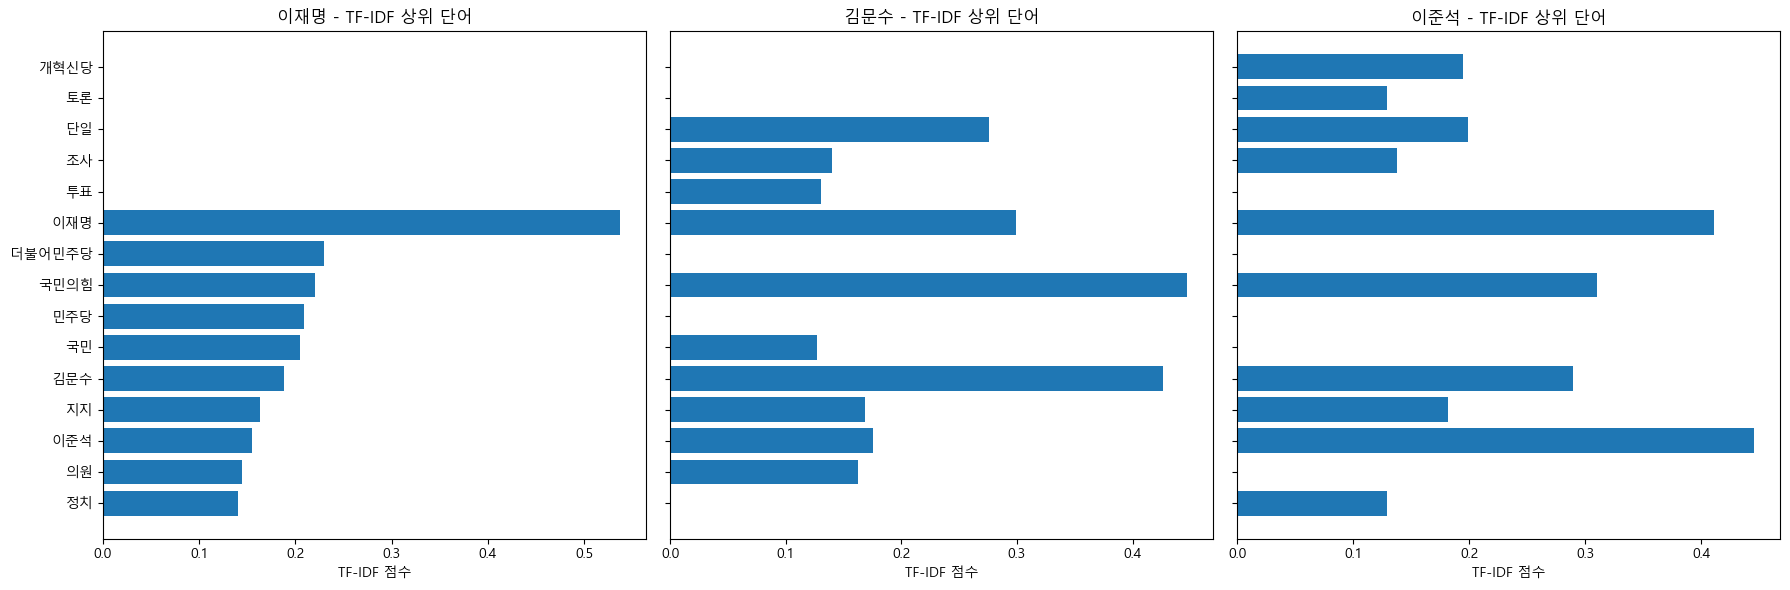

In [22]:
# 공통 단어들 제거
corpus2 = list(documents.values())
names2 = list(documents.keys())

from sklearn.feature_extraction.text import TfidfVectorizer

# 사용자 정의 불용어 리스트
custom_stopwords = ['후보', '대선', '대통령', '선거', '후보', '대하', '아니', '이날', '위하']

# TF-IDF 벡터라이저 정의
vectorizer = TfidfVectorizer(max_features=100, stop_words=custom_stopwords)
X = vectorizer.fit_transform(corpus)

# 이후 코드는 동일
df_tfidf2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf2.index):
    top_terms = df_tfidf2.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()

In [23]:
# 고유 키워드 추출
## 특정 정치인에게만 특이하게 높은 TF-IDF를 보이는 단어를 구분

# 기존 TF-IDF 결과가 담긴 DataFrame: df_tfidf2
# 각 행: 정치인 이름, 각 열: 단어+품사 조합, 값: TF-IDF 점수

# 고유 키워드: 특정 정치인에서만 TF-IDF가 유독 높은 단어
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(10))




이재명의 고유 키워드:
이재명       0.182193
더불어민주당    0.132874
민주당       0.110217
법원        0.109796
사건        0.100849
국민        0.095200
재판        0.079775
선거법       0.056865
내란        0.048576
발언        0.030497
dtype: float64

김문수의 고유 키워드:
김문수     0.187063
국민의힘    0.181778
단일      0.143417
한덕수     0.071051
경선      0.063846
투표      0.060590
의원      0.050145
사전      0.025583
오후      0.021872
만나      0.018869
dtype: float64

이준석의 고유 키워드:
이준석     0.279923
개혁신당    0.131249
토론      0.081103
공약      0.041925
tv      0.040315
토론회     0.036720
단일      0.028890
보수      0.018242
정책      0.018095
여성      0.017955
dtype: float64


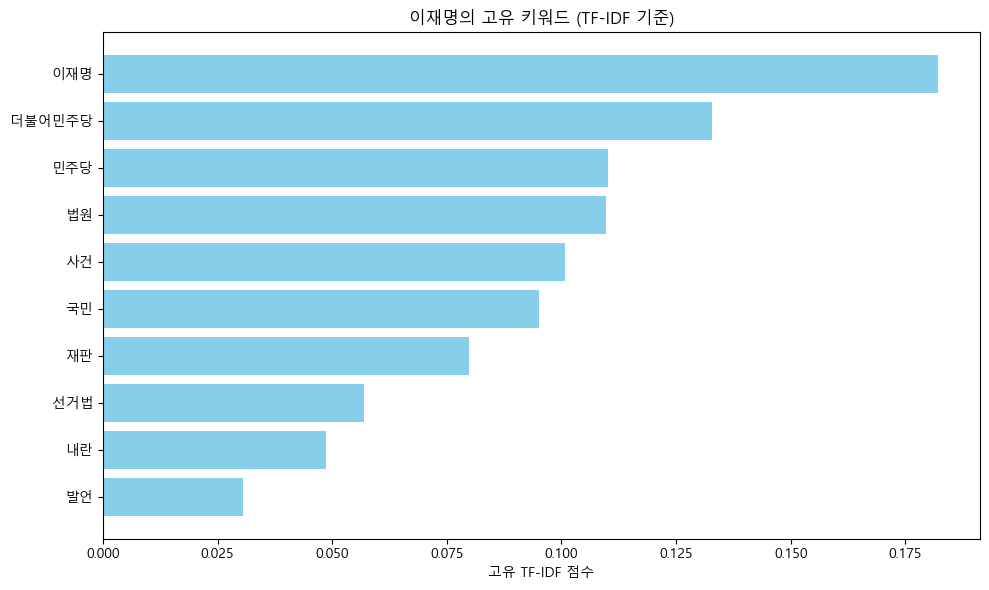

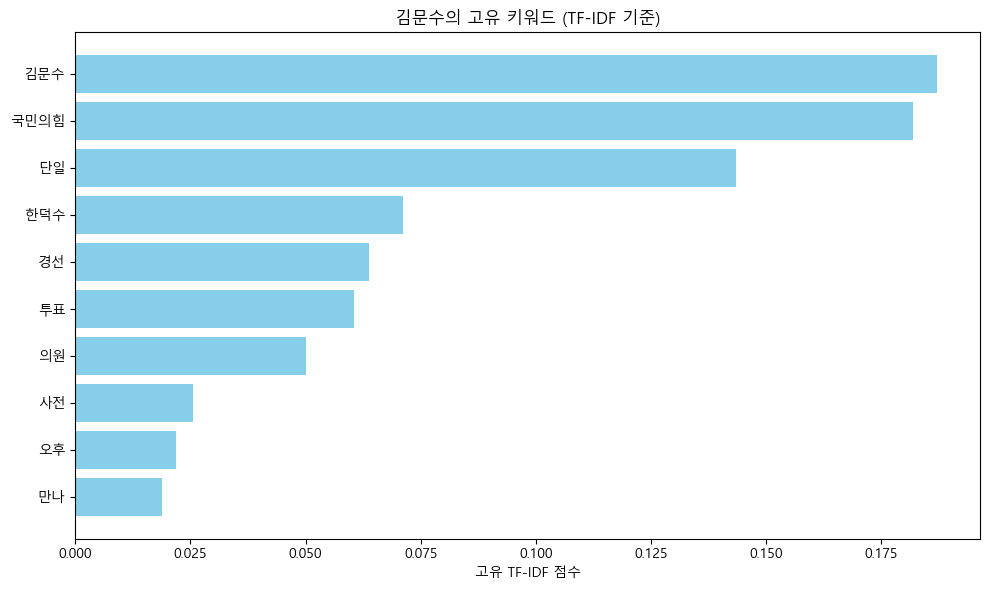

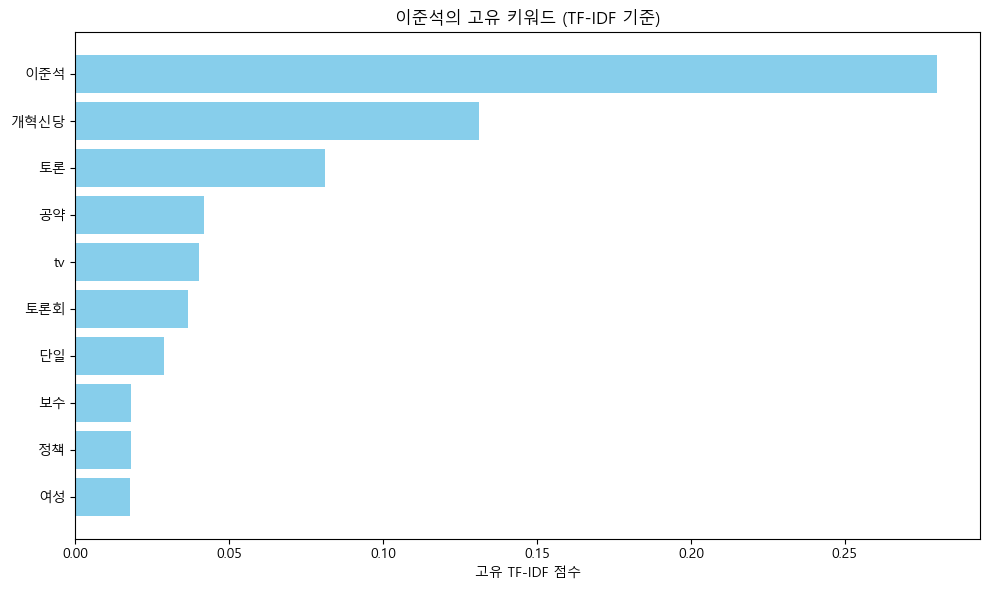

In [24]:
# 고유 키워드 시각화

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 10개
for name in df_tfidf2.index:
    # 고유성 계산: 해당 정치인의 TF-IDF - (다른 정치인 평균)
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    top_dominant = dominant_words.sort_values(ascending=False).head(10)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()


이재명의 고유 키워드:
이재명       0.182193
더불어민주당    0.132874
민주당       0.110217
법원        0.109796
사건        0.100849
국민        0.095200
재판        0.079775
선거법       0.056865
내란        0.048576
발언        0.030497
통합        0.030322
지역        0.027981
정치        0.027972
밝히        0.025053
의원        0.023324
dtype: float64

김문수의 고유 키워드:
김문수     0.187063
국민의힘    0.181778
단일      0.143417
한덕수     0.071051
경선      0.063846
투표      0.060590
의원      0.050145
사전      0.025583
오후      0.021872
만나      0.018869
윤석열     0.017159
탄핵      0.016881
여론      0.016805
위원장     0.015415
대책      0.013701
dtype: float64

이준석의 고유 키워드:
이준석     0.279923
개혁신당    0.131249
토론      0.081103
공약      0.041925
tv      0.040315
토론회     0.036720
단일      0.028890
보수      0.018242
정책      0.018095
여성      0.017955
지지      0.015700
경제      0.013877
사회      0.011670
정치      0.011203
질문      0.010293
dtype: float64


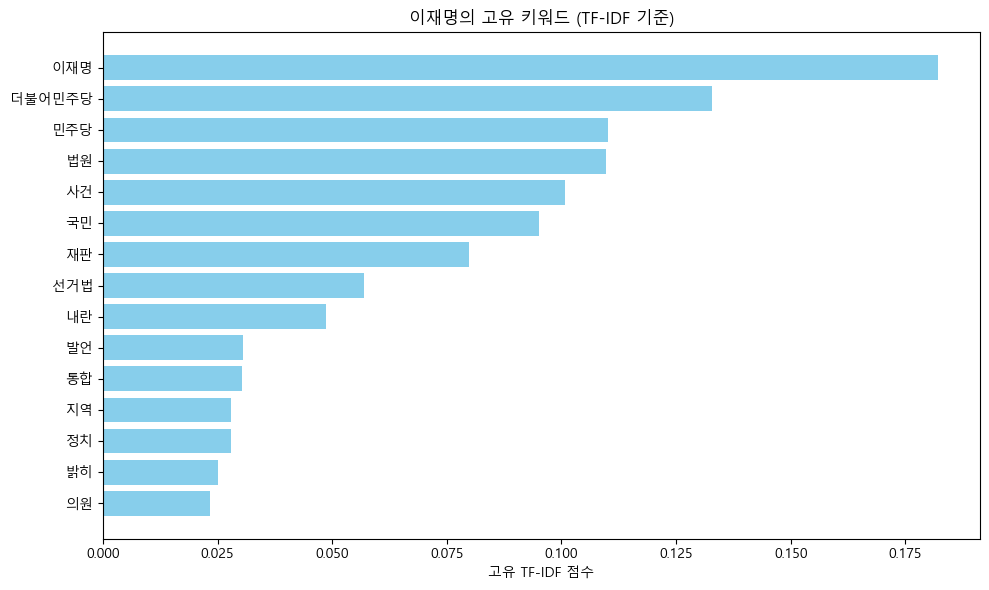

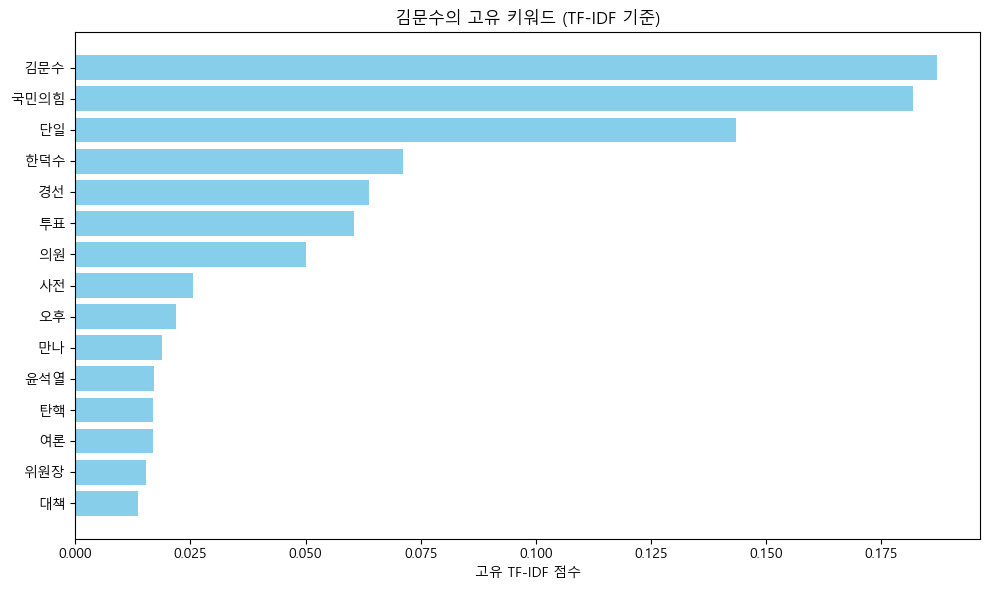

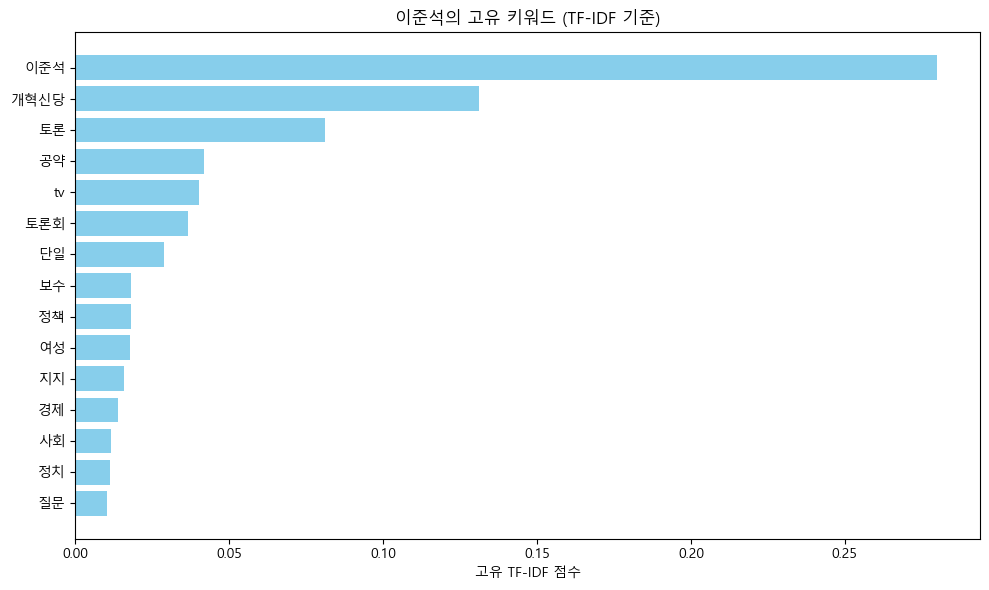

In [25]:
# 사용자 정의 불용어 설정
custom_stopwords = {"이런", "그런"}

# 고유 키워드 추출 (15개)
for name in df_tfidf2.index:
    # TF-IDF 점수에서 다른 후보 평균을 뺀 값 → 고유성 점수
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # 불용어 제거
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    # 상위 15개 고유 키워드 출력
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(15))

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 15개
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # ✅ 여기에도 불용어 제거 적용!
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    top_dominant = dominant_words.sort_values(ascending=False).head(15)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()


In [27]:
custom_stopwords = ['후보', '대선', '대통령', '선거', '대하', '아니', '이날', '위하']

def remove_stopwords(text, stopwords):
    tokens = text.split()
    filtered_tokens = [t for t in tokens if t not in stopwords]
    return " ".join(filtered_tokens)

corpus_tf = []
for name in names:
    cleaned_text = remove_stopwords(documents[name], custom_stopwords)
    corpus_tf.append(cleaned_text)


[TF-IDF 단어와 TF 단어 사이 일치율]

이재명:
  TF-IDF 상위 50 단어: ['가능', '강조', '개혁신당', '경제', '공약', '국민', '국민의힘', '국회', '기자', '김문수', '나오', '내란', '단일', '대표', '대한민국', '더불어민주당', '따르', '만들', '문제', '민주당', '발언', '밝히', '법원', '보수', '보이', '사건', '사람', '사진', '생각', '서울', '선거법', '열리', '오후', '위원회', '유세', '윤석열', '의원', '이재명', '이준석', '재판', '정부', '정책', '정치', '조사', '지금', '지나', '지역', '지지', '투표', '함께']
  TF 상위 50 단어: ['가능', '강조', '개혁신당', '경제', '공약', '국민', '국민의힘', '국회', '기자', '김문수', '나오', '내란', '단일', '대표', '대한민국', '더불어민주당', '따르', '만들', '문제', '민주당', '발언', '밝히', '법원', '보수', '보이', '사건', '사람', '사진', '생각', '서울', '선거법', '열리', '오후', '위원회', '유세', '윤석열', '의원', '이재명', '이준석', '재판', '정부', '정책', '정치', '조사', '지금', '지나', '지역', '지지', '투표', '함께']
  일치 단어 (50개): ['가능', '강조', '개혁신당', '경제', '공약', '국민', '국민의힘', '국회', '기자', '김문수', '나오', '내란', '단일', '대표', '대한민국', '더불어민주당', '따르', '만들', '문제', '민주당', '발언', '밝히', '법원', '보수', '보이', '사건', '사람', '사진', '생각', '서울', '선거법', '열리', '오후', '위원회', '유세', '윤석열', '의원', '이재명', '이준석', '재판', '정부', '정책', '정치', '조사', 

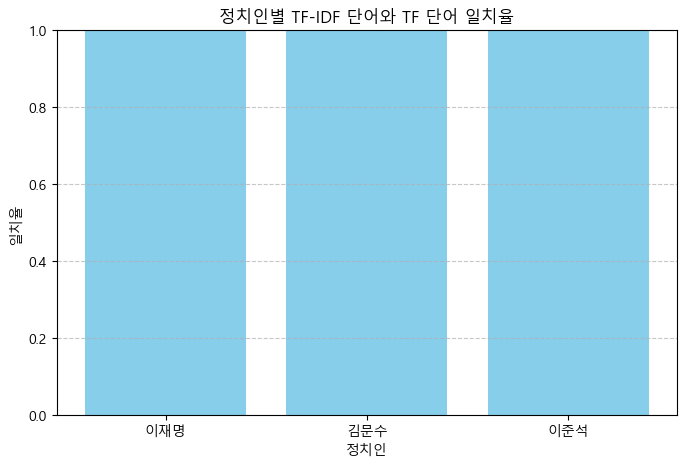

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

if not isinstance(custom_stopwords, list):
    custom_stopwords = list(custom_stopwords)

# 1. 각 정치인 별 TF-IDF 상위 단어와 TF 상위 단어의 일치율 계산
tf_vectorizer = CountVectorizer(max_features=100, stop_words=None)
tf_X = tf_vectorizer.fit_transform(corpus_tf)
df_tf = pd.DataFrame(tf_X.toarray(), columns=tf_vectorizer.get_feature_names_out(), index=names)

match_ratios = [] 

print("\n[TF-IDF 단어와 TF 단어 사이 일치율]")

for name in names:
    tfidf_top50 = set(df_tfidf2.loc[name].sort_values(ascending=False).head(50).index)
    tf_top50 = set(df_tf.loc[name].sort_values(ascending=False).head(50).index)
    
    intersection = tfidf_top50.intersection(tf_top50)
    tfidf_only = tfidf_top50 - intersection  # TF-IDF에만 있는 단어
    tf_only = tf_top50 - intersection        # TF에만 있는 단어
    
    match_ratio = len(intersection) / 50
    match_ratios.append(match_ratio)
    
    print(f"\n{name}:")
    print(f"  TF-IDF 상위 50 단어: {sorted(tfidf_top50)}")
    print(f"  TF 상위 50 단어: {sorted(tf_top50)}")
    print(f"  일치 단어 ({len(intersection)}개): {sorted(intersection)}")
    print(f"  TF-IDF에만 있는 단어 ({len(tfidf_only)}개): {sorted(tfidf_only)}")
    print(f"  TF에만 있는 단어 ({len(tf_only)}개): {sorted(tf_only)}")
    print(f"  일치율 = {match_ratio:.2f}")

# 시각화 (이후 코드 동일)
plt.figure(figsize=(8, 5))
plt.bar(names, match_ratios, color='skyblue')
plt.ylim(0, 1)
plt.title('정치인별 TF-IDF 단어와 TF 단어 일치율')
plt.ylabel('일치율')
plt.xlabel('정치인')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



[정치인 간 TF-IDF 기반 코사인 유사도]
          이재명       김문수       이준석
이재명  1.000000  0.846308  0.864627
김문수  0.846308  1.000000  0.898912
이준석  0.864627  0.898912  1.000000


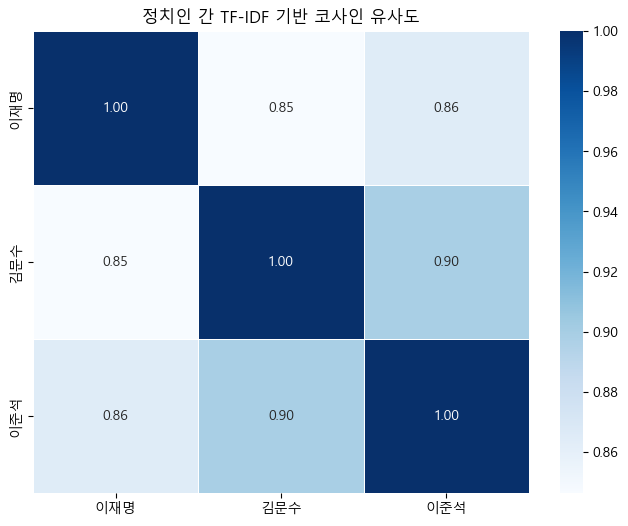

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns



# 코사인 유사도 계산
cos_sim_matrix = cosine_similarity(df_tfidf2.values)

# 결과를 DataFrame으로 보기 좋게 정리
df_cos_sim = pd.DataFrame(cos_sim_matrix, index=names, columns=names)

print("\n[정치인 간 TF-IDF 기반 코사인 유사도]")
print(df_cos_sim)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cos_sim, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('정치인 간 TF-IDF 기반 코사인 유사도')
plt.show()
